# Exercises 3: Linear Regression

The following lab-session is adapted from that of Section 3.6 in Introduction to Statistical Learning with R.


We use the Boston data set, which records `medv` (median house value) for 506 census tracts in Boston. We will seek to predict
medv using 12 predictors such as `rm` (average number of rooms per house), `age` (average age of houses), and `lstat` (percent of households with low socioeconomic status).


(A useful reference for working with linear regressions in statsmodels is https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html)

There are three main ways of fitting a linear regression with Python: 
* The `OLS` method from statsmodels.api
* The `ols` method from statsmodels.formula.api
  This method allows us to specify models ``R-style'' rather than via
  the design matrix (see e.g.\
  \url{https://www.statsmodels.org/dev/example\_formulas.html}).\\

  Note that, in the formula, you can specify that X is a factor as
  `C(X)`. Also note that anything enclosed in ``the identity
  function'' `I()` will be taken literally; for instance, 
  $\texttt{I}(x_1*x_2)$ gives a new variable with the numeric product
  of variables $x_1$ and $x_2$.
* The method `LinearRegression` from `linear_model` in `sklearn`.

You are encouraged to try all three methods. When you read the manual pages, note that outcome Y is referred to as the
endogenous variable and features X as the exogenous variable(s).



In [1]:
# Import relevant packages
import numpy as np
from pandas import read_csv, DataFrame
from math import log, sqrt
import matplotlib.pyplot as plt

import statsmodels.api as sm
## to be able to specify models as Y ~ lstat we need the formula API
from statsmodels.formula.api import ols 

In [2]:
# Load data from csv; change the directory as you need!
Boston = read_csv("Boston.csv")
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Simple Linear Regression (i.e. with one explanatory variable)

We will start by fitting a simple linear regression model, with `medv` as the response and `lstat`  as the predictor: $medv = \beta_0 + \beta_1 lstat + \epsilon$

First plot the response `medv` against `lstat` and see what the relationship looks like, so that you have an idea what the result may be.

In [3]:
y = Boston['medv']
AX1 = Boston['lstat']
AX1 = sm.add_constant(AX1) # add intercept
AX1.head()

# Fit the model
model = sm.OLS(y, AX1).fit()
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           5.08e-88
Time:                        10:56:36   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [4]:
AX1 = Boston['lstat']
## Need an intercept in the model, so we add the constant feature 
AX1 = sm.add_constant(AX1)
sm_model = sm.OLS(Boston['medv'], AX1)
lm1 = sm_model.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           5.08e-88
Time:                        10:56:36   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# Alternatively specify via the formula API
ols("medv ~ 1 + lstat", Boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           5.08e-88
Time:                        10:56:36   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can also get the estimated parameters directly from the model. A confidence interval for model coefficients is found in the model summary. 

In [6]:
## Coefficients beta:
lm1.params

const    34.553841
lstat    -0.950049
dtype: float64

Standard error of residuals -- the square root of the estimated variance $\sigma^2$

In [7]:
sqrt(lm1.mse_resid)

6.215760405398068

In [8]:
## Estimated variance mse_resid is computed as RSS divided by the residual degrees of freedom 
## (found as "DF residuals" in summary and df_resid in model object
(lm1.resid**2).sum()/lm1.df_resid

38.63567741731436

In [9]:
## Yet another way of obtaining the variance 
lm1.ssr/lm1.df_resid

38.63567741731436

##  Predictions, confidence intervals, and prediction intervals

We can get a prediction--the estimated mean value of `medv` for a specific value of `lstat`--for any new datapoint. To get an idea of uncertainty in the model, we can look at 
- a confidence interval for the value of the regression line to indicate how much the line itself would vary if fitted on new data.
- a prediction interval to indicates the range in which we expect the outcome to fall. 

Here we compute the 95% confidence- and prediction intervals (specified as alpha = 0.05 = 1-0.95)

A. Make again a scatterplot of `medv` against `lstat` and draw the regression line on top using get_prediction() to calculate the fitted values (if you just want them for the data that you used for fitting the model, you could also get them directly from the model object as `fittedvalues`). Here is an example predicting on the observations in the Boston data set -- try to replace `X` with a new dataset containing your favourite values of the explanatory variable. 

B. Add two curves to show the upper and lower confidence limits as a function of `lstat`.

C. Add two curves to show the upper and lower prediction limits as well.

Comment on the plot and, in particular, note how the prediction intervals contain the confidence interval for the predicted value.

In [10]:
## Predicting on a new dataset (here just the original one X)
pred1 = lm1.get_prediction(AX1)
## Results of prediction in a dataframe
pred1_df = pred1.summary_frame(alpha=0.05)
pred1_df.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.822595,0.405814,29.025299,30.619891,17.584603,42.060587
1,25.870390,0.308011,25.265246,26.475534,13.643413,38.097367
2,30.725142,0.433488,29.873477,31.576807,18.483488,42.966796
3,31.760696,0.466794,30.843594,32.677798,19.514315,44.007076
4,29.490078,0.395994,28.712077,30.268079,17.253328,41.726828


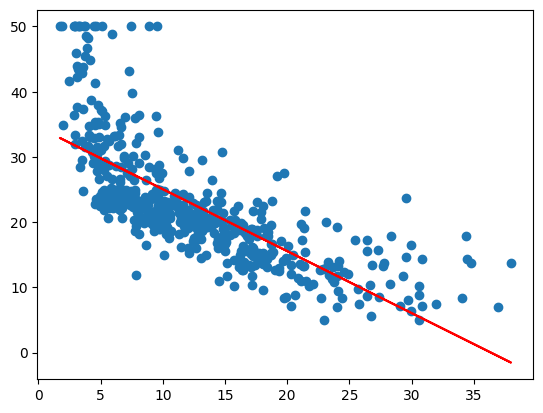

In [11]:
# A. Your code here
plt.scatter(Boston['lstat'], Boston['medv'])
plt.plot(Boston['lstat'], pred1_df['mean'], c='r')
plt.show()

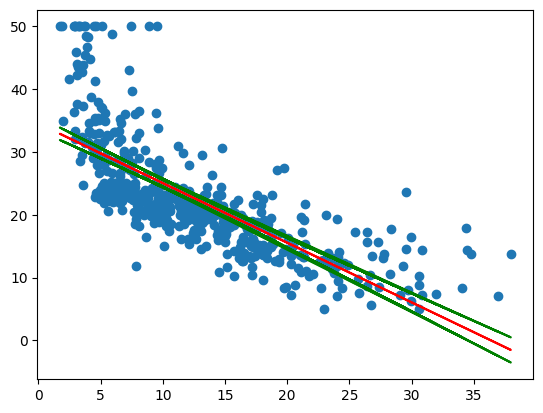

In [12]:
# B. Your code here
plt.scatter(Boston['lstat'], Boston['medv'])
plt.plot(Boston['lstat'], pred1_df['mean'], c='r')
plt.plot(Boston['lstat'], pred1_df['mean_ci_lower'], c='g')
plt.plot(Boston['lstat'], pred1_df['mean_ci_upper'], c='g')
plt.show()

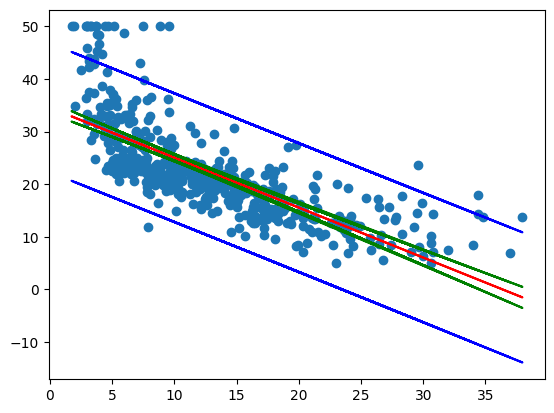

In [13]:
# C. Your code here
plt.scatter(Boston['lstat'], Boston['medv'])
plt.plot(Boston['lstat'], pred1_df['mean'], c='r')
plt.plot(Boston['lstat'], pred1_df['mean_ci_lower'], c='g')
plt.plot(Boston['lstat'], pred1_df['mean_ci_upper'], c='g')
plt.plot(Boston['lstat'], pred1_df['obs_ci_lower'], c='b')
plt.plot(Boston['lstat'], pred1_df['obs_ci_upper'], c='b')
plt.show()

Based on the matrix formula for the parameter estimates, implement a function that takes the estimated parameters and a new feature value x and returns the predicted value $\hat y$. (Try to vectorize it such that you can give
it multiple new input values and get multiple predictions out). Check that you get the same as obtaining the
predicted values from the linear regression directly.

In [14]:
# Your code here
def pred(X):
    constant, lstat = lm1.params
    
    return constant + X*lstat

nX = np.array([1, 2, 3, 4, 5])
y1 = pred(nX)
y2 = lm1.predict(np.c_[ np.ones(5), nX])
print(y, y2)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64 [33.60379153 32.65374217 31.70369282 30.75364346 29.80359411]


## Model checking methods

We can obtain relevant quantities either directly from the results of a linear model or from its method get_influence(). Here is an overview.

From the model fit we have
- Raw residuals: resid

From get_influence() we have 
- Studentized residuals: resid_studentized_internal ($\beta$ estimated leaving out observation $i$)
- Externally studentized residuals: resid_studentized_external ($\beta$ and $\sigma^2$ both estimated leaving out observation $i$)
- hatvalues: This is also called leverage and are the diagonal elements $h_{ii}$ of the hatmatrix $X(X^TX)^{-1}X^T$. Obtained as hat_matrix_diag
- Cook's distance: cooks_distance

To get the classical standardised residuals $e_i/\sqrt{\hat\sigma^2(1-h_{ii})}$ we seem to need to do the scaling ourselves. 

In [15]:
infl = lm1.get_influence()

## Obtaining standardised residuals
SE_of_residuals = np.sqrt(lm1.mse_resid*(1-infl.hat_matrix_diag))
stdres = np.divide(lm1.resid, SE_of_residuals)
stdres

0     -0.938750
1     -0.687871
2      0.641041
3      0.264480
4      1.081699
         ...   
501   -0.477868
502   -0.858140
503   -0.853618
504   -1.031025
505   -2.443658
Length: 506, dtype: float64

### Is the assumption of Gaussian errors reasonable? 
Compare standardised residuals to a standard normal distribution

Plot the standardised residuals ordered from smallest to highest against the quantiles from a standard normal distribution. To get the latter, for N datapoints (and thus N residuals) in your data you compute the standard normal quantile for the N probabilities (1/(N+1), ..., N/(N+1)). It is good practice to make the plot square. Statsmodels also has a built-in function to make this quantile-quantile plot.

What do you see?

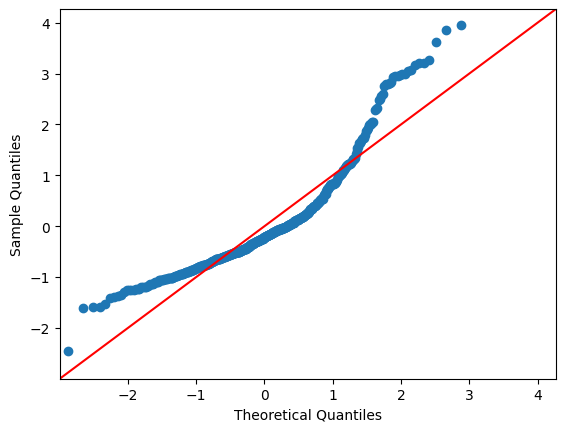

In [16]:
sm.qqplot(stdres, line='45'); ## Compare to standard normal distribution

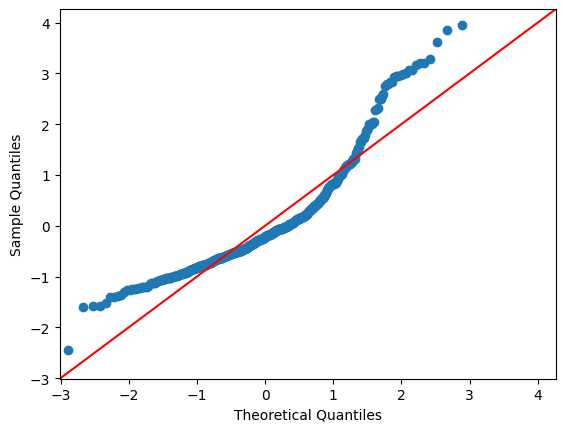

In [17]:
## We can also use the studentized residuals for this kind of check. 
## With this much data, it will not make much of a difference. 
## They should be compared to a t-distribution with n-p-1 degrees of freedom (df_resid)
import scipy.stats as stats
sm.qqplot(lm1.get_influence().resid_studentized_internal, # observed residuals 
          stats.t, distargs=(lm1.df_resid,), #compare with quantiles of t-distribution 
          line = '45'  #reference line
         );

### Is there any systematic trend in the residuals?

To inspect this, make the following two types of plots:
1. The raw residuals $y_i- \hat y_i$ against the explanatory variable `lstat`.
2. The raw residuals against the fitted values $\hat y_i$. 

The first type of plot is relatively straightforward in revealing whether variation is small or large for certain values of the explanatory variables. It can require a bit of practice to interpret systematic trends in the second plot, but think of it as inspecting variation around the regression surface at different heights of the surface.

In the plots, try to assess whether
- there are any curvatures or other trends; the points should be nicely scattered around a horizontal line in 0.
- there is evidence of non-homogeneous variance

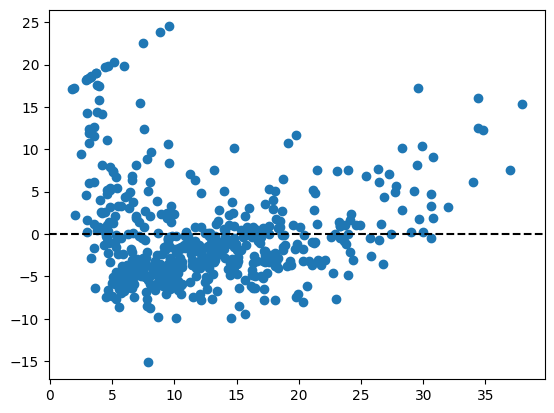

In [18]:
# plt.scatter(X['lstat'], y - pred1_df['mean'])
plt.scatter(AX1['lstat'], lm1.resid)
plt.axhline(y=0, c='black', ls='--')
plt.show()
# No very heteroscedastic innit

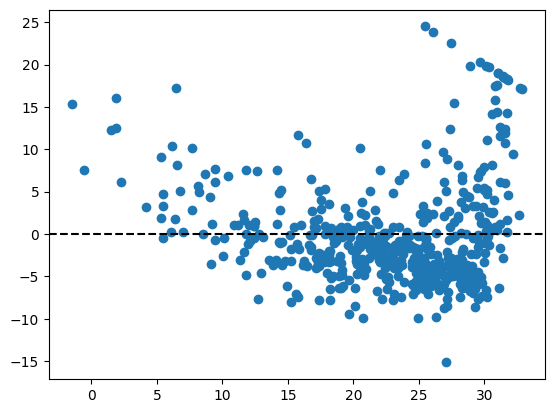

In [19]:
plt.scatter(pred1_df['mean'], y - pred1_df['mean'])
plt.axhline(y=0, c='black', ls='--')
plt.show()
# wow

### Influential observations

You can think of leverage (diagonal elements of the hat matrix) as flags for *potentially* influential observations. Leverages are always bigger than 1/n, and they sum to the number of variables in the model, $p$. If the observation **also has a high studentized residual** --- the residual obtained when using the regression fitted *without the observation* $(x_i, y_i)$ --- then it is likely to act like a magnet on the regression surface. Cook's distance is a measure that in effect flags observation with high leverage and large residuals. 

Taking the observations in any order (for instance row index), make three plots on top of each other: 
1. Leverage (hatvalues) against index
2. Studentized residuals against index
3. Cooks distance against index

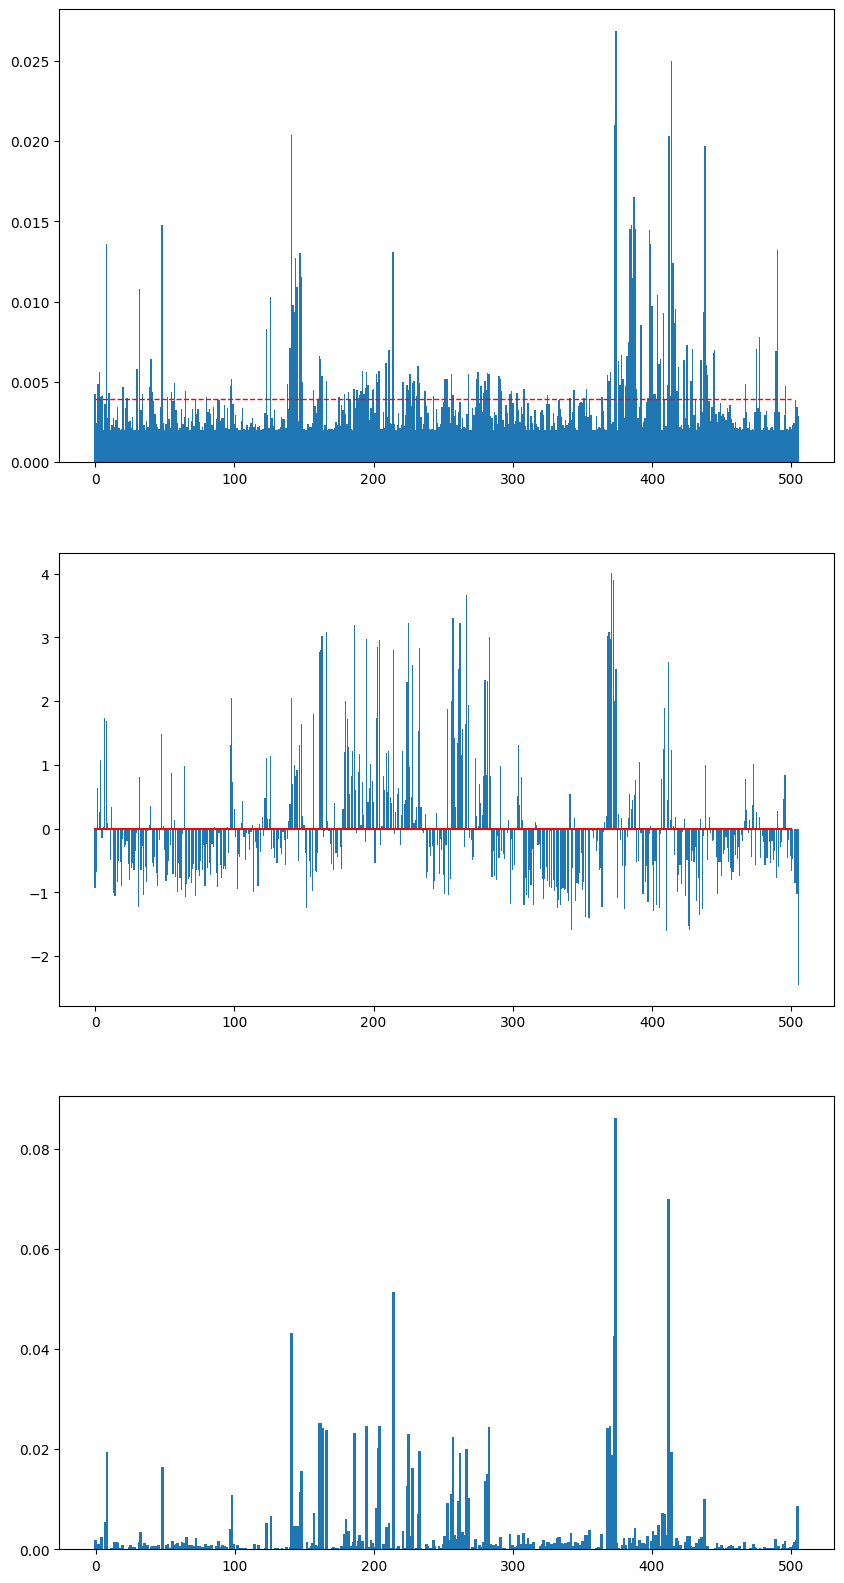

In [20]:
# Your code here
fig, ax = plt.subplots(3,1,figsize=(10,20))
ax[0].bar(range(len(infl.hat_matrix_diag)), infl.hat_matrix_diag, 1)
ax[0].plot([0,500], [np.mean(infl.hat_matrix_diag),np.mean(infl.hat_matrix_diag)], 'r--', lw=1)
ax[1].bar(range(len(infl.resid_studentized_external)), infl.resid_studentized_external)
ax[1].plot([0,500],[0,0],c='r')
ax[2].bar(range(len(infl.cooks_distance[0])), infl.cooks_distance[0], 2)
plt.show()

## Multiple Linear Regression (i.e. with multiple explanatory variables)

Now we make more complex models. 

Fit a model `lm2` that includes both `age` and `lstat`.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Boston = read_csv("Boston.csv")

AX1 = Boston[['age', 'lstat']].to_numpy()
y = Boston['medv'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    AX1, y, test_size=0.3, random_state=1337
)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

Fit then model `lm3` in which they enter also as a product (interaction). Note that if you include `lstat*age` using the formula API, then `lstat` and `age` are automatically added to the model -- a nice thing about formula APIs is that we only need to specify these highest order interactions.

In [22]:
from sklearn.preprocessing import PolynomialFeatures

AX1 = Boston[['age', 'lstat']].to_numpy()
y = Boston['medv'].to_numpy()

poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(AX1)

lm3 = LinearRegression()
lm3.fit(AX1, y)

LinearRegression()

### Non-linear transformations of the explanatory variables

We now perform a regression of `medv` onto `lstat` and `lstat` squared. 

Given a predictor $X$, we can create a predictor $X^2$ using
 `I(X**2)` in the formula API. The function `I()` is needed to protect the math formula inside.
 
When building models in practice, consider shifting your explanatory variables so that the intercept has a more interpretable meaning. For example, age=0 is rarely interesting, whereas age=25 or age="median value of the observed in our study" might very well be. Typically we would center them around the mean, the median or a value with some nice interpretation. It can also help on numerical stability, especially when fitting polynomials where values get more extreme.

In [23]:
lm4 = ols("medv ~ lstat + I(lstat**2)", Boston).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 08 Sep 2023   Prob (F-statistic):          1.56e-112
Time:                        10:56:40   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interactions
Create a categorical feature by splitting `age` into three groups using cutpoints of your own choice. 

(a) Fit a model where the lines capturing the relationship between `medv` and `lstat` are parallel for the three
age groups (only intercept changes)

(b) Fit a model where the lines have different intercept and slope in each of the three age groups (both intercept
and slope is unique to the group)

(c) Visualize the fitted lines by predicting on new data in a specific group and on a range of `lstat`
values (possibly much finer range than the values in the data). Plot the fitted values against the range of
`lstat` values.

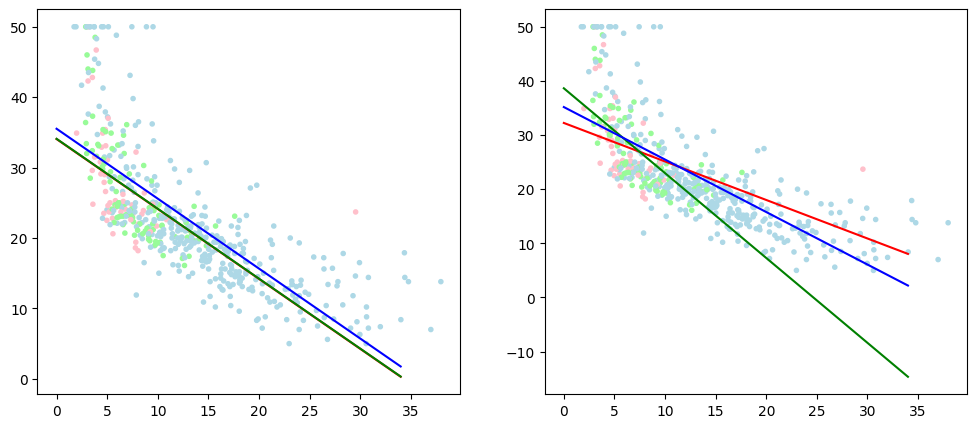

In [116]:
import pandas as pd
from statsmodels.formula.api import ols
# Cutting age into 3 groups
category = pd.cut(Boston['age'], (0, 25, 50, np.inf), labels=["Young", "Middleaged", "Old"])
dummies = pd.get_dummies(category)
data = Boston.join(dummies)
data.insert(0, "age_category", category)
# A
modelA = ols("medv ~ lstat + C(Young) + C(Middleaged) + C(Old)", data).fit()
# y=b0 + b1*lstat + b2*young + b3*middle + b4*old

# B
modelB = ols("medv ~ lstat + C(Young) + C(Middleaged) + C(Old) + lstat*C(Young) + lstat*C(Middleaged) + lstat*C(Old)", data).fit()
# y = b0 + b1*lstat + b2*young + b3*middleaged + b4*old + b5*lstat*young + b6*lstat*middle + b7*lstat*old

# C
intercept, young, middle, old, lstat = modelA.params
X = np.arange(35)
AX1 = intercept + lstat*X + young
AX2 = intercept + lstat*X + middle
AX3 = intercept + lstat*X + old
fi, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(X, AX1, c='r')
ax[0].plot(X, AX2, c='g')
ax[0].plot(X, AX3, c='b')
colors = { "Young": "pink", "Middleaged": "palegreen", "Old": "lightblue" }
ax[0].scatter(data['lstat'], data['medv'], marker='.', c=data['age_category'].map(colors))

intercept, young, middle, old, lstat, lstat_young, lstat_middle, lstat_old = modelB.params
BX1 = intercept + X*lstat + young + lstat_young*X
BX2 = intercept + X*lstat + middle + lstat_middle*X
BX3 = intercept + X*lstat + old + lstat_old*X
ax[1].plot(X, BX1, c='r')
ax[1].plot(X, BX2, c='g')
ax[1].plot(X, BX3, c='b')
ax[1].scatter(data['lstat'], data['medv'], marker='.', c=data['age_category'].map(colors))

plt.show()

## Comparing two nested models against each other

Consider the two models `lm1` and `lm4` above. The model `lm1` is nested into `lm4`, since it corresponds to setting the coefficient for the squared term to zero. We here discuss three possible ways of comparing the two models, but note that there are many more (see the book for details).

### Method 1: A t-test for whether a specific coefficient is zero ($\beta_j = 0$)

We can see from the summary of model lm4 that the squared term is highly significant. 

### Method 2: An F-test for whether several coefficients are zero 

The F-test based on sums of squares is much more general, in that it allows us to perform a single test addressing whether several coefficients could be zero. This could be because you want to remove several explanatory variables, or because you want to remove a single categorical variable with several groups. Even if we want to test just one coefficient, the F-test is preferable to the t-test. 

In [117]:
## output is (F-statistic, p-value of the test, degrees of freedom)
## Here we have removed just one parameter, so the degrees of freedom is 1.
lm4.compare_f_test(lm1)

(135.19982210087164, 7.630115993367343e-28, 1.0)

In [118]:
## Using formula (3.24) in ISLwR
difference_in_RSS = lm1.ssr - lm4.ssr
drop_in_parameters = lm1.df_resid - lm4.df_resid
residual_standard_error = lm4.mse_resid

(difference_in_RSS/drop_in_parameters)/residual_standard_error

135.19982210087164

The model summary always displays the F-test for removing *all* features of the model, i.e. that *all* coefficients are zero. The test simply compares the model to the "empty model" with no features and only an intercept.

In [119]:
lm4.mse_model/lm4.mse_resid 

448.5050879502775

### Method 3: Comparing by an information criterion

We can also compare models without using tests but rather some kind of "score" -- an information criterion -- such as AIC or BIC. For this comparison, **the models do not have to be nested**. 

Lower AIC is better, so we conclude also from this comparison that the model with a square term is preferred.

In [120]:
(lm4.aic, lm1.aic)

(3168.5159568137046, 3286.974956900157)

Consider the following models: 

$Y \sim 1 + I(1/X)$  (possibly adding X also?)

$Y \sim 1 + X + I(X^2)$

Which model is better? Explain whether you would use F-test or AIC for this.

## Can you make a model that fits well?

Try using the techniques for model checking and testing to guide you towards a well-fitting model. 

In [29]:
"""
  _   _         _   _                 _                        
 | \ | |       | | | |               | |                       
 |  \| | ___   | |_| |__   __ _ _ __ | | __  _   _  ___  _   _ 
 | . ` |/ _ \  | __| '_ \ / _` | '_ \| |/ / | | | |/ _ \| | | |
 | |\  | (_) | | |_| | | | (_| | | | |   <  | |_| | (_) | |_| |
 |_| \_|\___/   \__|_| |_|\__,_|_| |_|_|\_\  \__, |\___/ \__,_|
                                              __/ |            
                                             |___/             
"""